In [1]:
import roadvision3d
import yaml
import os
import numpy as np
import torch

from roadvision3d.src.datasets.kitti import KITTI
from roadvision3d.src.engine.model_builder import build_model
from roadvision3d.src.datasets.kitti_utils import get_objects_from_label

from inference import inference_on_dataset


from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from visualizer import draw_2d_bboxes, draw_3d_bboxes



%load_ext autoreload
%autoreload 2


## KITTI Labels

In [2]:
data_id = '000008'

img_path = '/home/javier/datasets/kitti/training/image_2/' + data_id + '.png'
label_path = '/home/javier/datasets/kitti/training/label_2/' + data_id + '.txt'
calib_path = '/home/javier/datasets/kitti/training/calib/' + data_id + '.txt'

In [3]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/kitti.yaml'
checkpoint_path = '/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS_1/logs/checkpoints/checkpoint_epoch_150.pth'

In [4]:
# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

In [5]:
print(cfg)

{'dataset': {'type': 'kitti', 'data_dir': '/home/javier/datasets/kitti', 'label_dir': '/home/javier/datasets/kitti/training/label_2', 'eval_cls': ['Car', 'Pedestrian', 'Cyclist'], 'batch_size': 24, 'num_workers': 16, 'class_merging': False, 'use_dontcare': False, 'use_3d_center': True, 'writelist': ['Car', 'Pedestrian', 'Cyclist'], 'random_flip': 0.5, 'random_crop': 0.0, 'scale': 0.4, 'shift': 0.1, 'drop_last_val': True, 'cls_mean_size': [[1.76255119, 0.66068622, 0.84422524], [1.52563191, 1.6285674, 3.8831164], [1.73698127, 0.59706367, 1.76282397]], 'cls_num': 3}, 'model': {'type': 'MonoLSS', 'backbone': 'dla34', 'neck': 'DLAUp', 'head': 'MonoLSSHead', 'loss': 'LSS_Loss', 'downsample': 4}, 'optimizer': {'type': 'adam', 'lr': 0.001, 'weight_decay': 1e-05}, 'lr_scheduler': {'warmup': True, 'decay_rate': 0.1, 'decay_list': [90, 120]}, 'trainer': {'max_epoch': 150, 'eval_start': 10, 'eval_frequency': 10, 'save_frequency': 50, 'disp_frequency': 10, 'log_dir': 'work_dirs/MonoLSS/logs/', 'out

In [6]:
# build dataloader or load de data manually
data = KITTI(split='train', cfg=cfg['dataset'])

In [7]:
data_id = 8
img = data.get_image(data_id)
labels = data.get_label(data_id)
calib = data.get_calib(data_id)

<class 'PIL.PngImagePlugin.PngImageFile'>


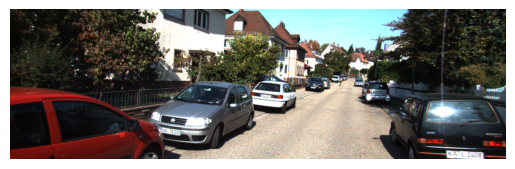

In [8]:
print(type(img))
# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # No mostrar los ejes para una mejor visualización
plt.show()

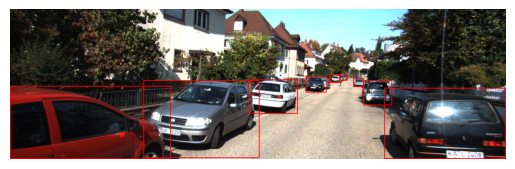

In [9]:
img_2d = img.copy()
draw_2d_bboxes(img_2d, labels)

<PIL.Image.Image image mode=RGB size=1242x375 at 0x7F166B098E50>
2D Projected Corners for Object: [(219.6746620723609, 403.2862886588031), (402.91726870978295, 423.2807544187317), (-270.7384583607418, 830.0395521690989), (-571.4676218035869, 708.1497077217031), (219.6746620723609, 191.43104661901944), (402.91726870978295, 193.04296503939213), (-270.7384583607418, 225.83513896466323), (-571.4676218035869, 216.00859556609544)]
  Size 3D (h, w, l): (1.6, 1.57, 3.23)
  Position: [-2.7   1.74  3.68]
  Rotation Y (Yaw): -1.29
2D Projected Corners for Object: [(487.63699821022067, 375.4892220773156), (335.92803044438335, 360.04188241741025), (519.9354933293416, 293.8205614228157), (624.7280931199305, 300.0885988132073), (487.63699821022067, 182.71377574091503), (335.92803044438335, 181.96214309840636), (519.9354933293416, 178.73996325479393), (624.7280931199305, 179.04495179073658)]
  Size 3D (h, w, l): (1.57, 1.5, 3.68)
  Position: [-1.17  1.65  7.86]
  Rotation Y (Yaw): 1.9
2D Projected Cor

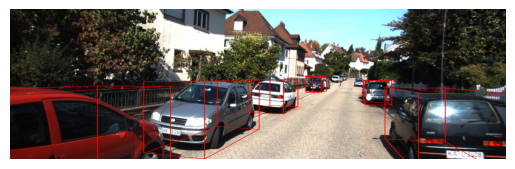

In [18]:
img_3d = img.copy()
print(img_3d)
draw_3d_bboxes(img_3d, labels, calib)

## Eval results

In [11]:
labels_eval = get_objects_from_label('/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS_1/output/EPOCH_150/data/000008.txt')

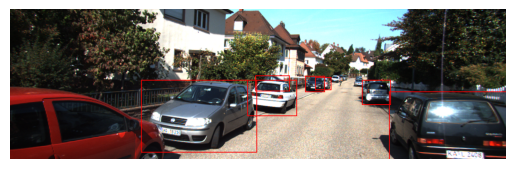

  Size 3D (h, w, l): (1.5, 1.61, 3.79)
  Position: [-1.22  1.59  8.14]
  Rotation Y (Yaw): 1.8
  Size 3D (h, w, l): (1.45, 1.61, 3.78)
  Position: [ 1.04  1.58 14.16]
  Rotation Y (Yaw): -1.3
  Size 3D (h, w, l): (1.5, 1.59, 3.54)
  Position: [ 8.26  1.63 19.73]
  Rotation Y (Yaw): -1.27
  Size 3D (h, w, l): (1.58, 1.62, 3.96)
  Position: [ 6.72  1.35 31.15]
  Rotation Y (Yaw): 1.84
  Size 3D (h, w, l): (1.47, 1.58, 3.65)
  Position: [3.9  1.74 6.16]
  Rotation Y (Yaw): -1.41
  Size 3D (h, w, l): (1.53, 1.61, 3.91)
  Position: [ 9.21  1.4  38.01]
  Rotation Y (Yaw): 1.89
  Size 3D (h, w, l): (1.53, 1.58, 3.8)
  Position: [ 2.13  1.36 32.88]
  Rotation Y (Yaw): 0.14
[[7.215377e+02 0.000000e+00 6.095593e+02 4.485728e+01]
 [0.000000e+00 7.215377e+02 1.728540e+02 2.163791e-01]
 [0.000000e+00 0.000000e+00 1.000000e+00 2.745884e-03]]


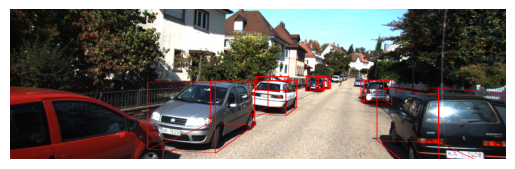

In [12]:
img_2d_eval = img.copy()
draw_2d_bboxes(img_2d_eval, labels_eval)
img_3d_eval = img.copy()
draw_3d_bboxes(img_3d_eval, labels_eval, calib)

# Test inference

In [13]:
data_id = '000008'
split = 'test'

In [14]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/kitti_v2.yaml'
test_cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# checkpoint_path = '/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS_1/logs/checkpoints/checkpoint_epoch_150.pth'
# test_cfg['tester']['resume_model'] = checkpoint_path
print(test_cfg['tester'])

{'threshold': 0.2, 'out_dir': './MonoLSS/testset_out', 'resume_model': '/home/javier/pytorch/RoadVision3D/work_dirs/MonoLSS_good/MonoLSS_v2/logs/checkpoints/checkpoint_epoch_150.pth'}


In [15]:
results = inference_on_dataset(data_id, split, cfg, device)
print(results)

FileNotFoundError: 

In [ ]:
data = KITTI(split=split, cfg=cfg['dataset'])
img = data.get_image(data_id)
calib = data.get_calib(data_id)

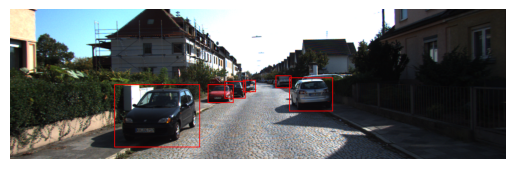

In [ ]:
img_2d = img.copy()
draw_2d_bboxes(img_2d, results)

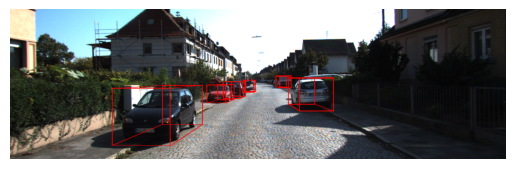

In [ ]:
img_3d = img.copy()
draw_3d_bboxes(img_3d, results, calib)